In [1]:
project_id = 'd6d2262b-e51f-44d5-a579-2c1353c3a307'
cv_key = '40c0667029c34ef6a0bb4bc6e55b3a43'
cv_endpoint = 'https://internshiptask42-prediction.cognitiveservices.azure.com/'

model_name = 'animal' 
print('Ready to predict using model {} in project {}'.format(model_name, project_id))

Ready to predict using model animal in project d6d2262b-e51f-44d5-a579-2c1353c3a307


Classifying images in test_images_animals ...


CustomVisionErrorException: Operation returned an invalid status code 'Too Many Requests'

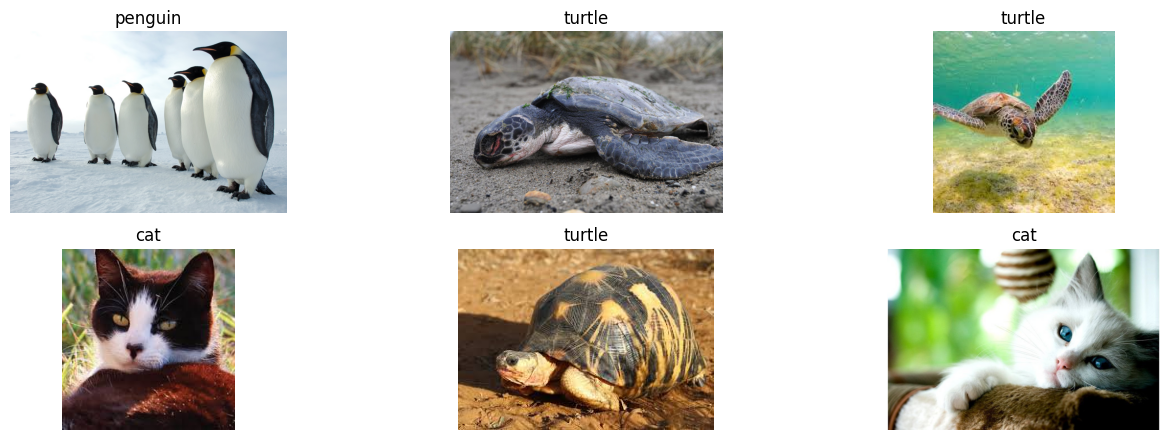

In [3]:
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib inline

#to read the test images from the test images folder
test_folder = os.path.join('test_images_animals')
test_images = os.listdir(test_folder)

#Creating an instance of the prediction service
credentials = ApiKeyCredentials(in_headers={"Prediction-key": cv_key})
custom_vision_client = CustomVisionPredictionClient(endpoint=cv_endpoint, credentials=credentials)

#Creating a figure to display the results
fig = plt.figure(figsize=(16, 8))

#Getting the images and showing the predicted classes for each one
print('Classifying images in {} ...'.format(test_folder))
for i in range(len(test_images)):
    #Opening the image, and using the custom vision model to classify it
    image_contents = open(os.path.join(test_folder, test_images[i]), "rb")
    classification = custom_vision_client.classify_image(project_id, model_name, image_contents.read())
    #The results includes a prediction for each tag in descending order of probability
    prediction = classification.predictions[0].tag_name
    #Displaying the image with its predicted class
    img = Image.open(os.path.join(test_folder, test_images[i]))
    a=fig.add_subplot(int(len(test_images)/3), 3,i+1)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(prediction)
plt.show()